# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Internship\Heart Disease Dashboard\Heart Disease data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#cp....chest pain
#trestbps....resting blood pressure
#chol....serum cholestoral
#fbs...fasting blood sugar..
#restecg...resting electrocardiographic results
#thalach... maximum heart rate achived
#exang...exercise include agina(include 1=yes,0=no)
#oldpeak...ST depression include by exercise relative to rest
#slope... The slope of the peak exercise ST segment
#ca.... number of major vessels (0-3)
#thal...3=normal....6=fixed defect...7=reversable defect
#target: 0= low change of heart attack..... 1=more chances of heart attack

# Data Cleaning

In [6]:
df.shape                            #shape of the dataset..

(1025, 14)

In [7]:
df.size                            #number of elements in the dataset

14350

In [8]:
df.describe()                      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isnull().sum()                     #checking null values...

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.columns                         #show all the columns...

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.duplicated().any()             #checking duplicated values are there or not...

True

In [13]:
df=df.drop_duplicates()            #drop duplicated values...

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visualization

In [15]:
df.corr()            #normal visualization...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Correlation Matrix

<Axes: >

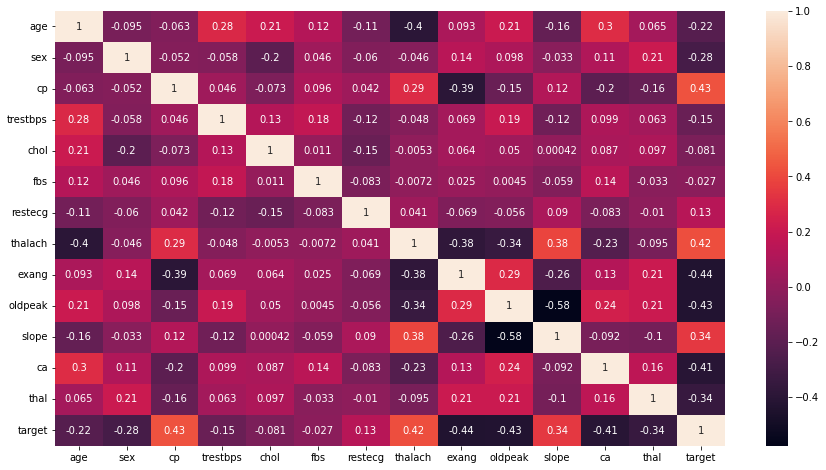

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)        #here we use heatmap for visualizing the data...

In [17]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presnce'

In [18]:
# adding new column to dataset of converted data

df['heart_disease'] = df['target'].apply(heart_diseases)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence


In [20]:
Disease_Heart = df.groupby('heart_disease')['target'].count()
Disease_Heart

heart_disease
absence    138
presnce    164
Name: target, dtype: int64

# Pie chart for showing Data that people have heart disease or not?

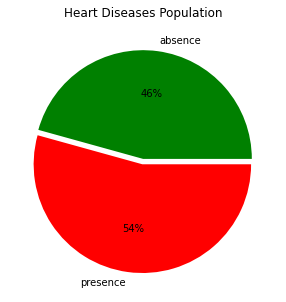

In [21]:
plt.figure(figsize=(5,5))
clrs = sns.color_palette('bright')
explode = [0, 0.05]
plt.pie(Disease_Heart, labels=['absence','presence'], autopct='%0.0f%%', colors=['Green','Red'], explode=explode)
plt.title('Heart Diseases Population')
plt.show()

# Visualization of Population age


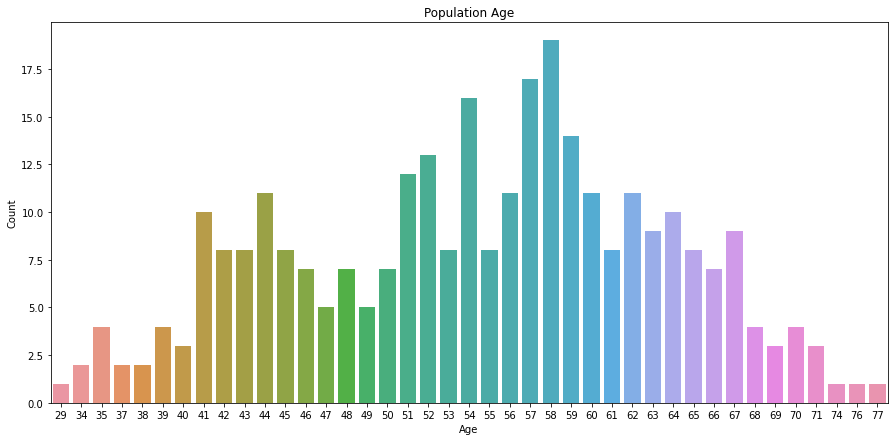

In [22]:
plt.figure(figsize=(15,7))
plt.title("Population Age")
sns.countplot(x='age',data=df)               #palette='bright'
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# visualize the difference between age of population

In [23]:
#using statistical analysis to find the minimum,average and maximum of the population age

min_age=df['age'].min()
avg_age=df['age'].mean()
max_age=df['age'].max()

print("The minimum age is:",(min_age))
print("The average age is:",round(avg_age,2))
print("The maximum age is:",(max_age))

The minimum age is: 29
The average age is: 54.42
The maximum age is: 77


In [24]:
#divide the population ages in different categories....

young_age=df[(df['age']>=29)& (df['age']<40)]
middle_age=df[(df['age']>=40)& (df['age']<55)]
old_age=df[(df['age']>55)]

print("Number of young age peoples are:",len(young_age))
print("Number of middle age peoples are:",len(middle_age))
print("Number of old age peoples are:",len(old_age))

Number of young age peoples are: 15
Number of middle age peoples are: 128
Number of old age peoples are: 151


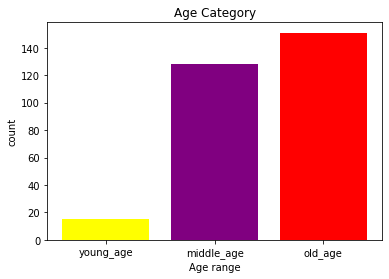

In [25]:
#Bar plot for different categories of population ages...

new=['young_age','middle_age','old_age']
allage=[len(young_age),len(middle_age),len(old_age)]
plt.bar(new,allage,color=['yellow','purple','red'])
plt.title('Age Category')
plt.xlabel('Age range')
plt.ylabel('count')
plt.show()

In [26]:
#function for determining young age,middle age and old age... 

def age_range(i):
    'Range of age'
    if i>=29 and i<40:
        return 'Young'
    elif i>=40 and i<55:
        return 'Middle'
    else:
        return 'Old'

In [27]:
#Update dataset(Age_Range)

df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,Middle
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,Middle
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,Old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,Old


In [28]:
#convert numerical data to categorical...

def sexgender(i):
    if i==1:
        return 'Male'
    else:
        return 'Female'

In [29]:
df['Gender']=df['sex'].apply(sexgender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,Age_Range,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,Middle,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,Middle,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,Old,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,Old,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,Old,Female


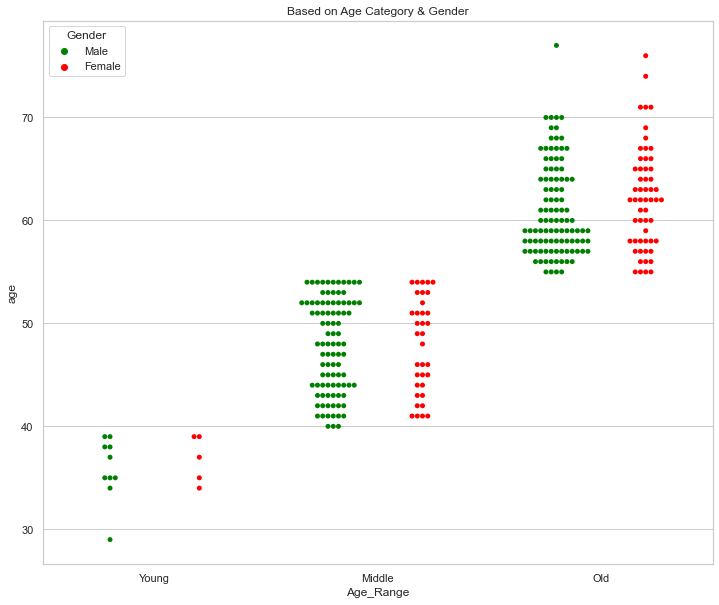

In [39]:
plt.figure(figsize=(12,10))
x = df.Age_Range
y = df.age
sns.set(style='whitegrid', palette='bright')
sns.swarmplot(x='Age_Range', y='age', hue='Gender', data=df, dodge=True, order=['Young', 'Middle', 'Old'], palette={'Male': 'green', 'Female': 'red'})
plt.title('Based on Age Category & Gender')
plt.show()



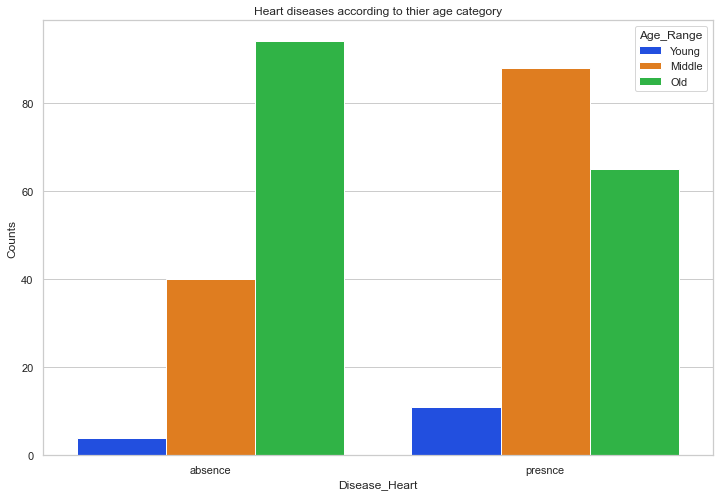

In [31]:
# count plot for heart diseases according to thier age category

plt.figure(figsize=(12,8))
hue_orders = ['Young', 'Middle', 'Old']
plt.title("Heart diseases according to thier age category")
sns.countplot(x='heart_disease', hue='Age_Range', data=df, hue_order=hue_orders, palette='bright')
plt.xlabel("Disease_Heart")
plt.ylabel('Counts')
plt.show()

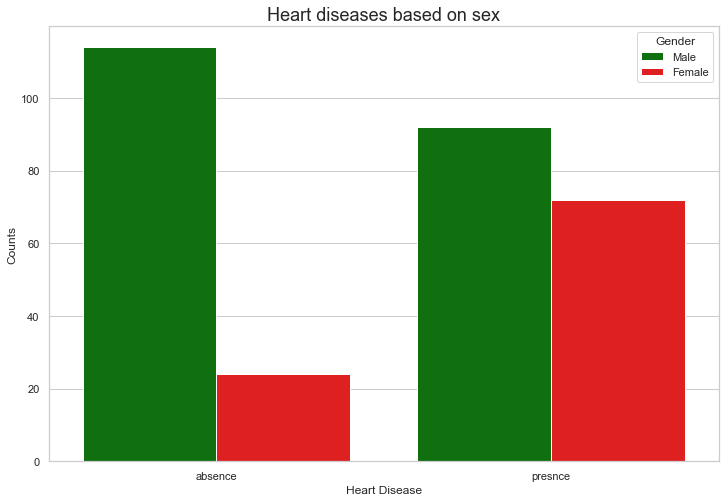

In [32]:
# count plot for heart diseases based on sex

plt.figure(figsize=(12,8))
plt.title("Heart diseases based on sex", fontsize=18)
sns.countplot(x='heart_disease', hue='Gender', data=df, palette={'Male': 'green', 'Female': 'red'})
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

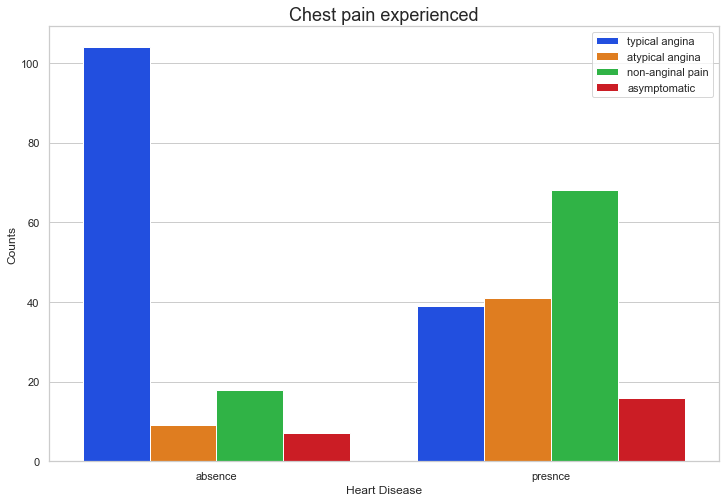

In [33]:
# count plot based on chest pain experienced

plt.figure(figsize=(12,8))
# hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Chest pain experienced", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='cp', data=df, palette="bright")
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

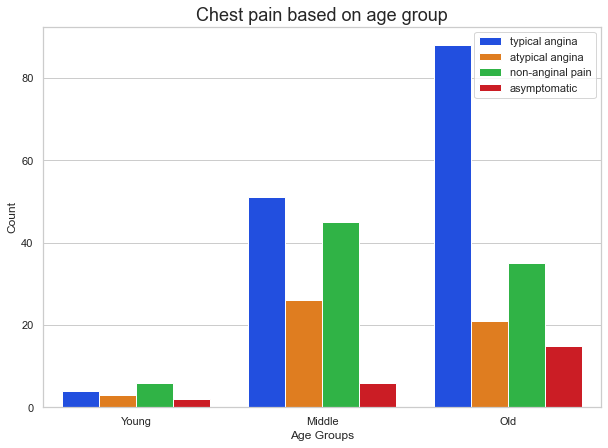

In [34]:
# Count plot for chest pain vs age group using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title("Chest pain based on age group", fontsize=18)
sns.countplot(x=df['Age_Range'], hue='cp', data=df, palette='bright', order=['Young', 'Middle', 'Old'])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

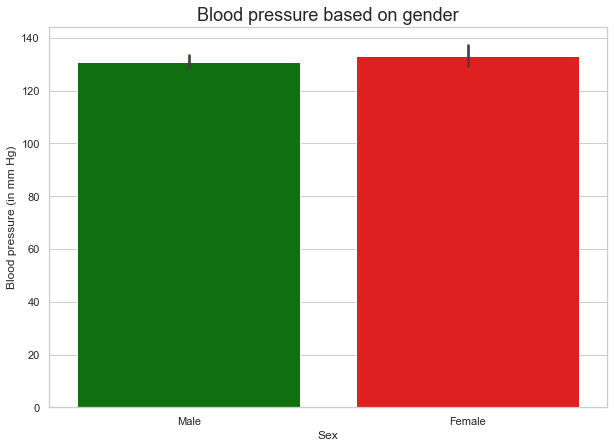

In [35]:
# Bar graph for Restin blood pressure(trestbs)(in mm Hg) based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure based on gender', fontsize=18)
sns.barplot(x='Gender', y='trestbps', data=df, palette={'Male': 'green', 'Female': 'red'})
plt.xlabel('Sex')
plt.ylabel('Blood pressure (in mm Hg)')
plt.show()

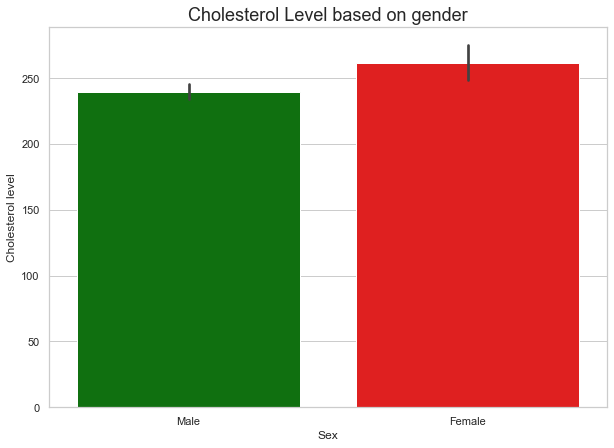

In [36]:
# Bar graph for Cholestral level based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholesterol Level based on gender', fontsize=18)
sns.barplot(x='Gender', y='chol', data=df, palette={'Male': 'green', 'Female': 'red'})
plt.xlabel('Sex')
plt.ylabel('Cholesterol level')
plt.show()

It is showing that cholestral level is more in female gender as compared to male...

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,Age_Range,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,Middle,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,Middle,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,Old,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,Old,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,Old,Female


In [38]:
df.to_csv(r"C:\Users\HP\Desktop\Internship\Heart Disease Dashboard\Heart Disease data cleaned.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\HP\\Desktop\\Internship\\Heart Disease Dashboard\\Heart Disease data cleaned.csv'